# Polynomial Interpolation – Exercise sheet 2

TMA4130/TMA4135 Høst 2023


## Lagrange interpolation

Remember how we can implement the cardinal functions and do the Lagrange interpolation:


In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# THIS FUNCTION HAS TO BE COMPLETED CREATING THE CARDINAL FUNCTIONS
def cardinal(xdata: np.ndarray, x: np.ndarray) -> list[np.ndarray]:
    """cardinal(xdata, x):
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x.
    """
    n = len(xdata)
    l = []
    for i in range(n):
        li = 1.0
        for j in range(n):
            if i is not j:
                li *= (x - xdata[j]) / (xdata[i] - xdata[j])
        l.append(li)
    return l

In [70]:
def lagrange(ydata: np.ndarray, l: list[np.ndarray]):
    """lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`).
    """
    poly = 0.0
    for i in range(len(ydata)):
        poly += ydata[i] * l[i]
    return poly

In [71]:
def f(x: np.ndarray) -> np.ndarray:
    return 2 ** (x**2 - x - 4)

In [72]:
# 2d
def chebyshev_nodes(n: int, a: float, b: float) -> np.ndarray:
    """Generate Chebyshev nodes on the interval [a,b]
    :param int `n`: Amount of nodes
    :param float `a`: Beginning of interval
    :param float `b`: End of interval
    :return: An array of Chebyshev nodes
    """
    return np.array(
        [
            (a + b) / 2 + (b - a) * np.cos((2 * k + 1) * pi / (2 * n)) / 2
            for k in range(n)
        ]
    )

In [73]:
# 2c
xdata = np.linspace(-5, 5, 3)
x = np.linspace(-5, 5, 100)
y = lagrange(f(xdata), l=cardinal(xdata, x))

print(
    "Maximal error e(x)≤|f(x)-p(x)| using Lagrange on the interval [-5, 5]: "
    f"{max(abs(f(x) - y)):.3f}"
)

# 2e
xdata_2 = chebyshev_nodes(3, -5, 5)
ydata_2 = f(xdata_2)
y_2 = lagrange(ydata_2, l=cardinal(xdata_2, x))

print(
    "Maximal error e(x)≤|f(x)-p(x)| using Chebyshev nodes on the interval "
    f"[-5, 5]: {max(abs(f(x) - y_2)):.3f}"
)

Maximal error e(x)≤|f(x)-p(x)| using Lagrange on the interval [-5, 5]: 55739601.865
Maximal error e(x)≤|f(x)-p(x)| using Chebyshev nodes on the interval [-5, 5]: 66419269.327


Maximal error e(x)≤|f(x)-p(x)| on the interval [-1, 2]: 0.032
Maximal error e(x)≤|f(x)-p(x)| using Chebyshev nodes on the interval [-1, 2]: 0.042


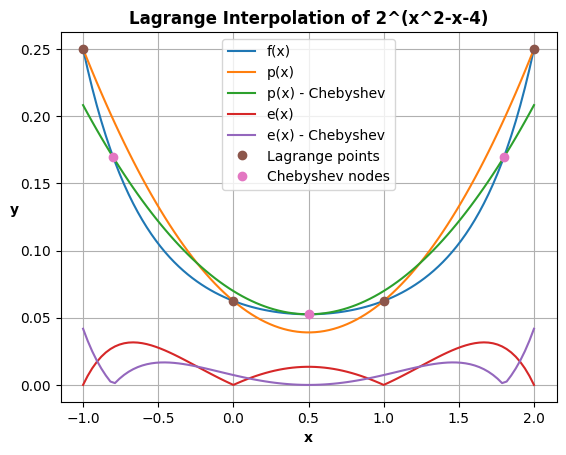

In [74]:
# 2c
xdata = np.linspace(-1, 2, 4)
ydata = f(xdata)
x = np.linspace(-1, 2, 100)
y = lagrange(ydata, l=cardinal(xdata, x))
actual_f = f(x)

print(
    "Maximal error e(x)≤|f(x)-p(x)| on the interval [-1, 2]: "
    f"{max(abs(actual_f - y)):.3f}"
)

# 2e
xdata_2 = chebyshev_nodes(3, -1, 2)
ydata_2 = f(xdata_2)
y_2 = lagrange(ydata_2, l=cardinal(xdata_2, x))

print(
    "Maximal error e(x)≤|f(x)-p(x)| using Chebyshev nodes on the interval "
    f"[-1, 2]: {max(abs(actual_f - y_2)):.3f}"
)

# Plotting
# 2c
plt.plot(x, actual_f, label="f(x)")
plt.plot(x, y, label="p(x)")
plt.plot(x, y_2, label="p(x) - Chebyshev")

# 2f
plt.plot(x, abs(actual_f - y), label="e(x)")
plt.plot(x, abs(actual_f - y_2), label="e(x) - Chebyshev")

plt.plot(xdata, ydata, "o", label="Lagrange points")
plt.plot(xdata_2, ydata_2, "o", label="Chebyshev nodes")

plt.title("Lagrange Interpolation of 2^(x^2-x-4)", fontweight=1000)
plt.xlabel("x", fontweight=750)
plt.ylabel("y", rotation=0, fontweight=750)
plt.grid()
plt.legend()
plt.show()

### a) Interpolating $x(t)$


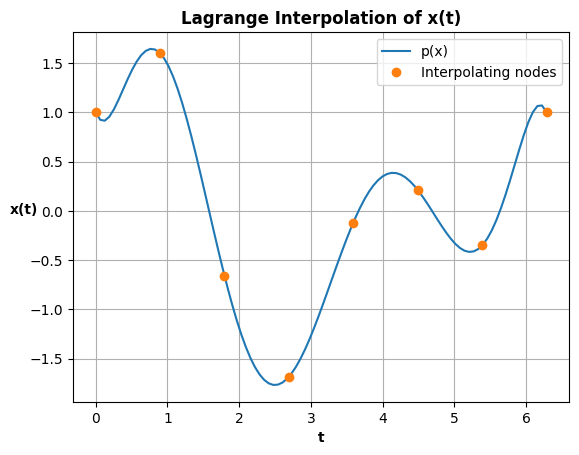

In [75]:
# Interpolation data
tdata = np.array([0, 0.8976, 1.7952, 2.6928, 3.5904, 4.4880, 5.3856, 6.2832])
xdata = np.array([1, 1.5984, -0.6564, -1.6828, -0.1191, 0.2114, -0.3514, 1])

# Grid points for plotting
t = np.linspace(0, tdata[-1], 100)

# Do the interpolation for the x coordinates here the final polynomial
# should be called
li = cardinal(tdata, t)
px = lagrange(xdata, li)

# and plot it here ...
plt.plot(t, px, label="p(x)")
plt.plot(tdata, xdata, "o", label="Interpolating nodes")
plt.title("Lagrange Interpolation of x(t)", fontweight=1000)
plt.xlabel("t", fontweight=750)
plt.ylabel("x(t)", rotation=0, fontweight=750)
plt.grid()
plt.legend()
plt.show()

### b) Interpolating $y(t)$


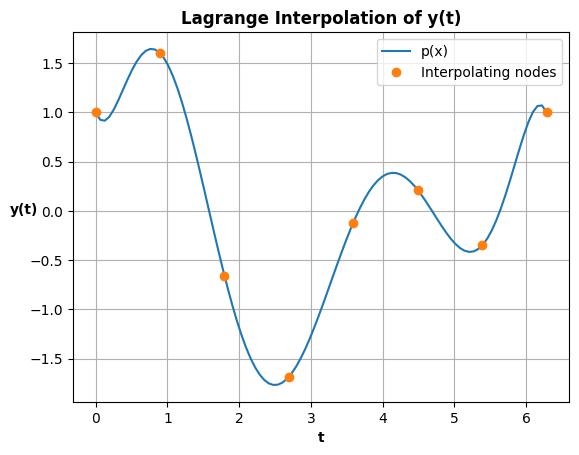

In [76]:
# Now do the same for the y coordinate...
ydata = np.array([0, 0.7818, 0.975, 0.4339, -0.4339, -0.9750, -0.7818, 0])

# the final polynomial should be called
py = lagrange(ydata, li)

# and plot it here ...
plt.plot(t, px, label="p(x)")
plt.plot(tdata, xdata, "o", label="Interpolating nodes")
plt.title("Lagrange Interpolation of y(t)", fontweight=1000)
plt.xlabel("t", fontweight=750)
plt.ylabel("y(t)", rotation=0, fontweight=750)
plt.grid()
plt.legend()
plt.show()

# Hint: you can re-use the "li" already computed, since the cardinal functions depend only on tdata, not on xdata!

### c) Trajectory

The trajectory of a particle moving in $\mathbb{R}^2$ is the locus of all $(x,y)$ points traveled by the particle. Therefore, all we have to do is plot the interpolation of $x$ against the interpolation of $y$.


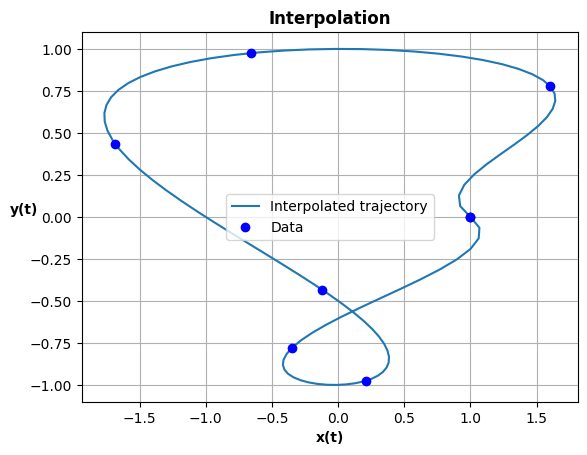

In [77]:
# If your polynomial in x is called px, Create your plot here
plt.plot(px, py, xdata, ydata, "ob")
plt.legend(["Interpolated trajectory", "Data"])
plt.title("Interpolation", fontweight=1000)
plt.xlabel("x(t)", fontweight=750)
plt.ylabel("y(t)", rotation=0, fontweight=750)
plt.grid()
plt.show()

### d) Find the exact values and compare


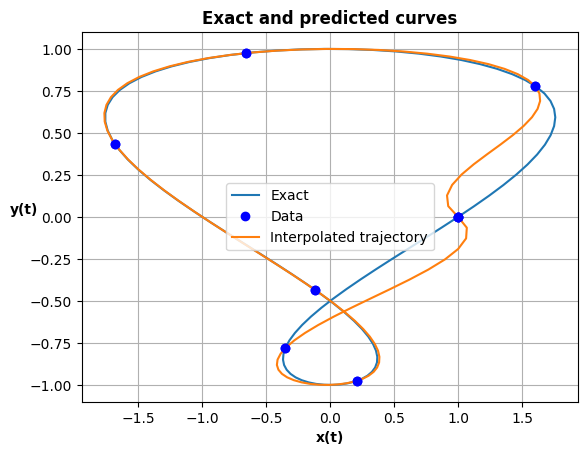

In [78]:
# Compute the exact values
def x_t(t: np.ndarray) -> np.ndarray:
    return np.cos(t) + np.sin(2 * t)


def y_t(t: np.ndarray) -> np.ndarray:
    return np.sin(t)


xdata_exact = x_t(t)
ydata_exact = y_t(t)

# Plot here both trajectories
# plt.plot(t, xdata_exact, label="x(t)")
# plt.plot(t, ydata_exact, label="y(t)")
plt.plot(xdata_exact, ydata_exact, xdata, ydata, "ob")
plt.plot(px, py, xdata, ydata, "ob")
plt.legend(["Exact", "Data", "Interpolated trajectory"])
plt.title("Exact and predicted curves", fontweight=1000)
plt.xlabel("x(t)", fontweight=750)
plt.ylabel("y(t)", rotation=0, fontweight=750)
plt.grid()
plt.show()